In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import my_util,my_scaler,read_file,arima
import pyflux as pf
from sklearn.metrics import mean_squared_error

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18,9

/home/zhiyedan/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data = read_file.read_aws('rds_cpu_utilization_e47b3b.csv')
data = data.to_frame()

diffn,_ = arima.best_diff(data,col='value')
data,diffn_col_name,bck_df = arima.add_diff_col(data,'value',diffn)

train,test = my_util.split_train_test(data,0.7)

order = arima.best_pq(train[diffn_col_name])
aic_order = order.aic_min_order
ar,ma = aic_order[0],aic_order[1]
print('ar is: %d, ma is:%d' % ar,ma)

model = pf.ARIMA(data=train, ar=ar, ma=ma, target=diffn_col_name, family=pf.Normal())

fit finished


In [14]:
x = model.fit("MLE")
x.summary()


Normal ARIMA(5,0,7)                                                                                       
======================================================= ==================================================
Dependent Variable: diff1                               Method: MLE                                       
Start Date: 2014-04-10 00:42:00                         Log Likelihood: -5040.7559                        
End Date: 2014-04-19 19:07:00                           AIC: 10109.5119                                   
Number of observations: 2814                            BIC: 10192.705                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 0.0001     0.0        2.8002   0.0051   (0.0 | 0.0001)           
AR(1)                                

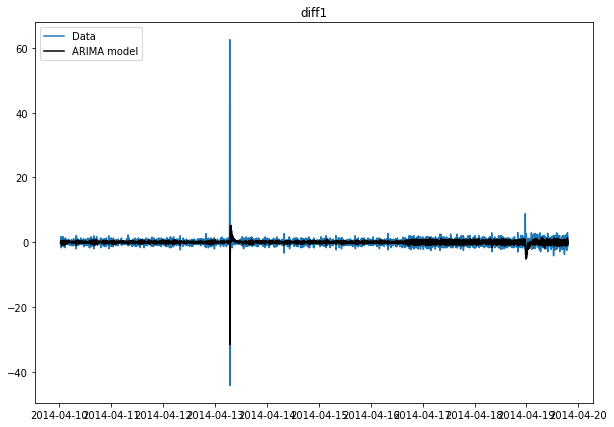

In [37]:
model.plot_fit()

In [16]:
y = model.fit("M-H")
y.summary()

Acceptance rate of Metropolis-Hastings is 0.0001
Acceptance rate of Metropolis-Hastings is 0.13325
Acceptance rate of Metropolis-Hastings is 0.20555
Acceptance rate of Metropolis-Hastings is 0.31155

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.31215
Normal ARIMA(5,0,7)                                                                                       
======================================================= ==================================================
Dependent Variable: diff1                               Method: Metropolis Hastings                       
Start Date: 2014-04-10 00:42:00                         Unnormalized Log Posterior: -5039.2866            
End Date: 2014-04-19 19:07:00                           AIC: 10106.5731927                                
Number of observations: 2814                            BIC: 10189.766264                                 
Latent Variable                          Median             Mean             

In [31]:
model.latent_variables.variables

AttributeError: 'LatentVariables' object has no attribute 'variables'

In [33]:
model.predict_is(h=10)

,Series
timestamp,
2014-04-19 18:22:00,-1.378531
2014-04-19 18:27:00,0.505496
2014-04-19 18:32:00,-1.145283
2014-04-19 18:37:00,0.307404
2014-04-19 18:42:00,-0.154704
2014-04-19 18:47:00,0.578966
2014-04-19 18:52:00,-1.088749
2014-04-19 18:57:00,1.495022
2014-04-19 19:02:00,-0.734225


In [36]:
train[-10:-1]

,value,diff1
timestamp,,
2014-04-19 18:22:00,27.6575,-1.9275
2014-04-19 18:27:00,30.1025,2.4450
2014-04-19 18:32:00,27.6475,-2.4550
2014-04-19 18:37:00,27.5000,-0.1475
2014-04-19 18:42:00,28.7600,1.2600
2014-04-19 18:47:00,28.4950,-0.2650
2014-04-19 18:52:00,26.2250,-2.2700
2014-04-19 18:57:00,29.1675,2.9425
2014-04-19 19:02:00,27.9000,-1.2675


In [ ]:
# data['recovery'] = arima.recovery_diff(data[diffn_col_name],diffn,bck_df['value'][0])